# Simple EDA on the income data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [2]:
data = pd.read_excel("adult.xlsx")
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data_num = data.copy()

In [4]:
data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.describe(include = ["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [6]:
data.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
data["workclass"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
data["occupation"].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [9]:
data["native-country"].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

# we notice "?" mark in two coloumns , so we need to replace those with appropriate values
# Hence data cleaning is required

In [10]:
attrib, counts = np.unique(data["workclass"], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts,axis = 0)]
data.workclass[data.workclass == "?"] = most_freq_attrib


In [11]:
attrib, counts = np.unique(data.occupation, return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data.occupation[data.occupation == "?"] = most_freq_attrib


In [12]:
attrib, counts = np.unique(data["native-country"], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts,axis = 0)]
data["native-country"][data["native-country"] == "?"] = most_freq_attrib

In [13]:
data.income

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [14]:
attrib,counts = np.unique(data.income, return_counts = True)

print(attrib)
print(counts)

data.income.unique()

['<=50K' '>50K']
[37155 11687]


array(['<=50K', '>50K'], dtype=object)

In [15]:
data.workclass.unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [16]:
attrib,counts = np.unique(data.income, return_counts = True)

print(attrib)
print(counts)

data.income.unique()

['<=50K' '>50K']
[37155 11687]


array(['<=50K', '>50K'], dtype=object)

In [17]:
data.income = data.income.map({"<=50K":0, ">50K":1})

In [18]:
data.income

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [19]:
data_num = data.drop(["educational-num","income"], axis = 1)

In [20]:
data_num

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [21]:
data_num.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [22]:
data_num.describe(include = ["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


# EDA ( Exploratary Data Analysis)
# Age
# i. Distribution

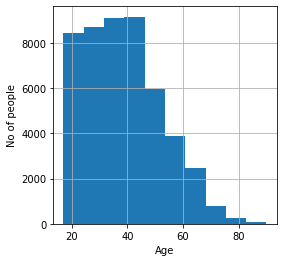

In [23]:
data.age.hist(figsize = (4,4))
plt.xlabel("Age")
plt.ylabel("No of people")
plt.show()

In [24]:
len(data.age[data.age > 70])

868

<AxesSubplot:>

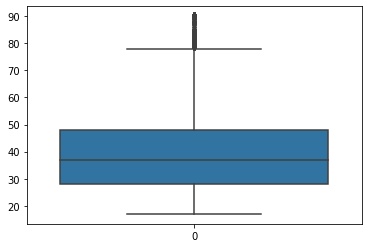

In [25]:
sns.boxplot(data.age)

<AxesSubplot:>

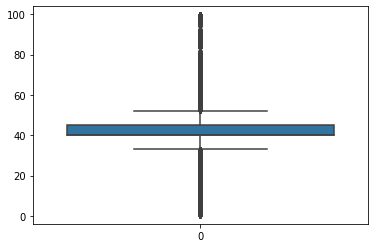

In [26]:
sns.boxplot(data["hours-per-week"])

<AxesSubplot:>

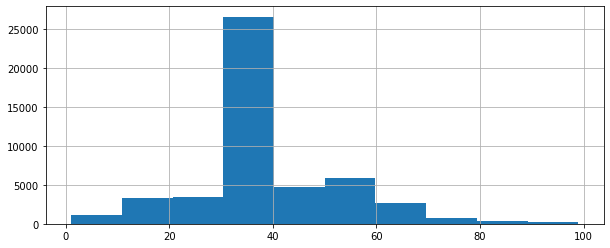

In [27]:
data["hours-per-week"].hist(figsize = (10,4))

<AxesSubplot:>

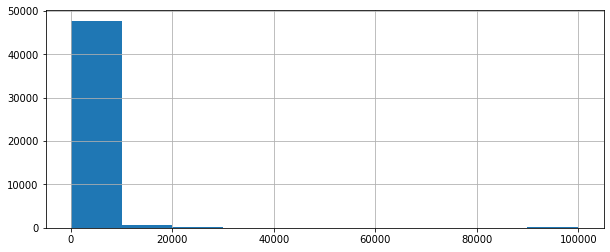

In [28]:
data["capital-gain"].hist(figsize = (10,4))

<AxesSubplot:>

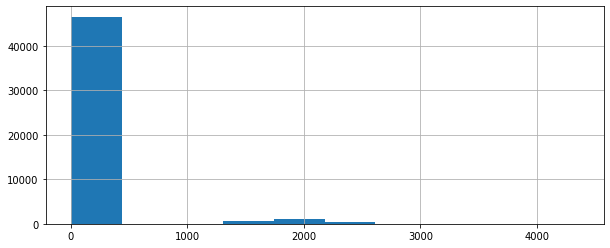

In [29]:
data["capital-loss"].hist(figsize = (10,4))

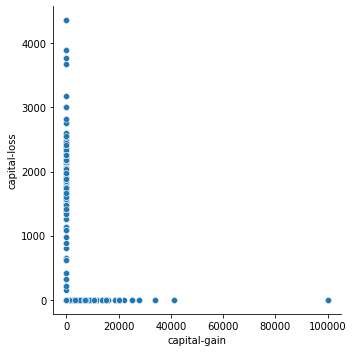

In [30]:
sns.relplot(x= "capital-gain", y= "capital-loss", data = data)
plt.xlabel("capital-gain")
plt.ylabel("capital-loss")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

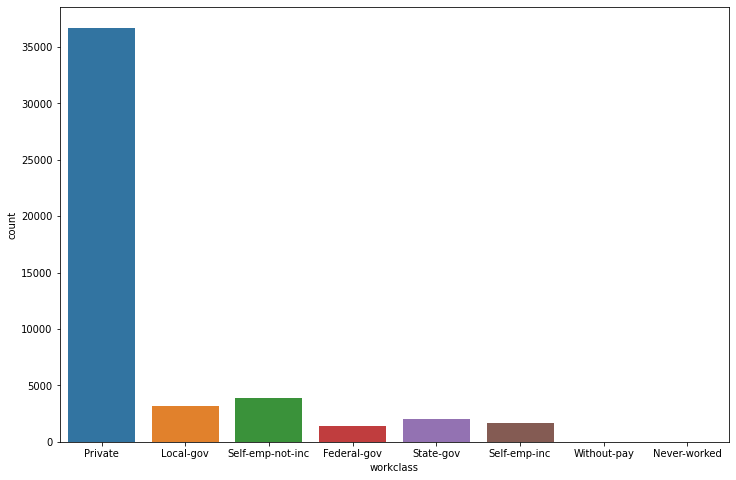

In [31]:

plt.figure(figsize = (12,8))
ax = sns.countplot(x = data.workclass)
plt.show


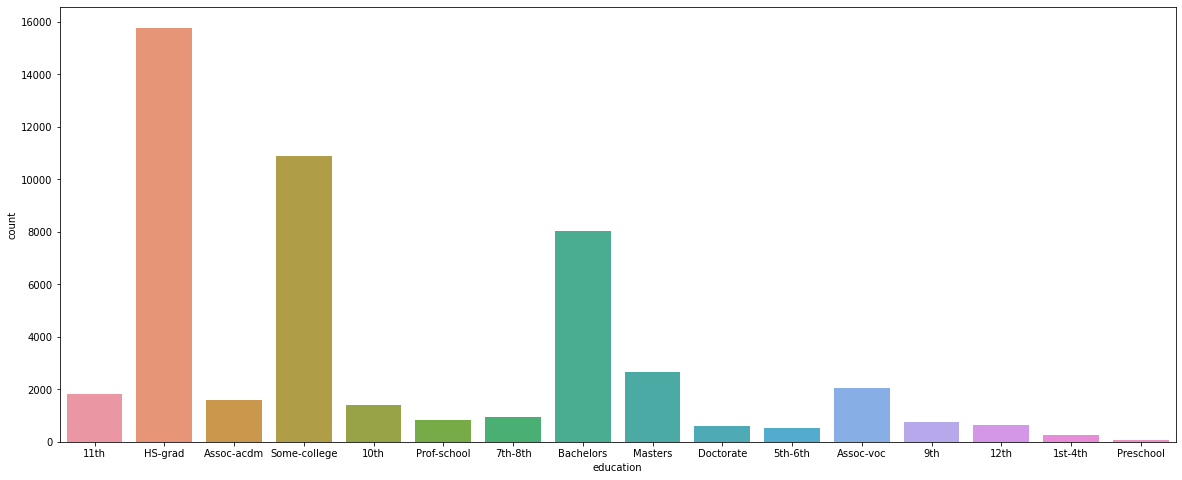

In [32]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = "education",data = data)
plt.show()

In [33]:
len(data.education[data.education == "Preschool"])

83

In [34]:
len(data.education[data.education == "10th"])

1389

In [35]:
len(data.education[data.education== "HS grads"])

0

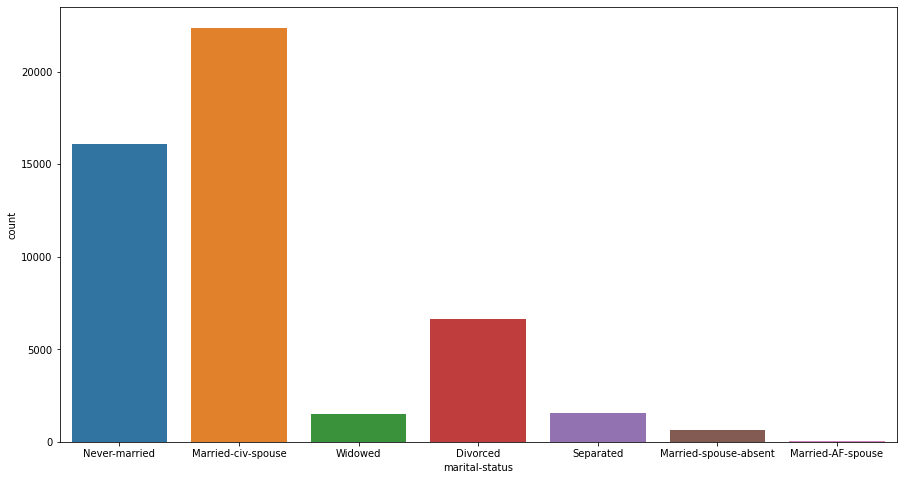

In [36]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = "marital-status", data = data)
plt.show()

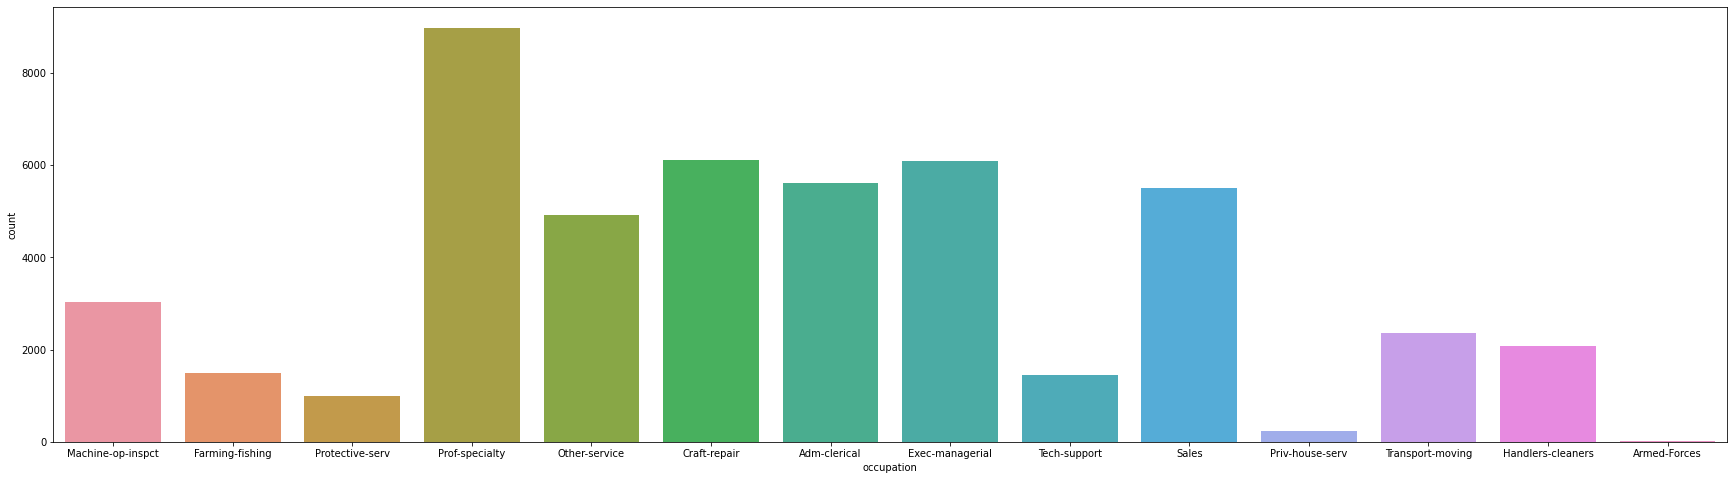

In [37]:
plt.figure(figsize = (30,8))
ax = sns.countplot(x = "occupation",data = data)
plt.show()

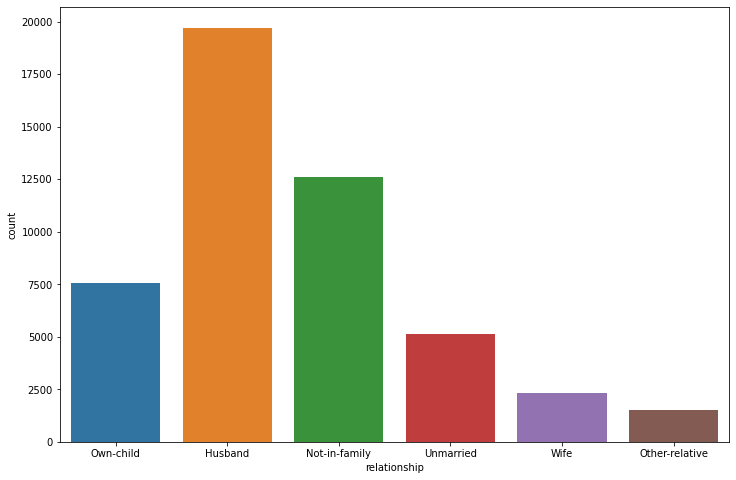

In [38]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x = "relationship", data = data)
plt.show()

In [39]:
len(data.relationship[data.relationship == "Husband"])

19716

In [40]:
len(data.relationship[data.relationship == "Wife"])

2331

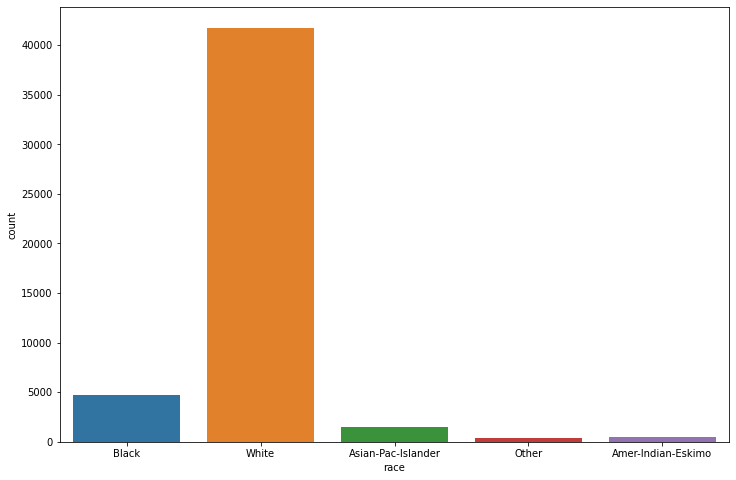

In [41]:
plt.figure(figsize =(12,8))
ax = sns.countplot(x = "race", data = data)
plt.show()

In [42]:
white = len(data.race[data.race == "White"])
Black = len(data.race[data.race =="Black"])
asian_islander = len(data.race[data.race == "Asian-Pac-Islander"])
other = len(data.race[data.race == "Other"])
Amer_Indian_Eskimo = len(data.race[data.race == "Amer-Indian-Eskimo"])

print(asian_islander)

data.race.unique()

1519


array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [43]:
l= len(data)

In [44]:
print("% of Blackin the working population:",round((Black/l)*100, 2))
print("% of white in the working population:",round((white/l)*100, 2))
print("% of Asian-Pac-slander in the working population:",round((asian_islander/l)*100, 2))
print("% of Other in the working population:",round((other/l)*100, 2))
print("% of American-Indian-Eskimo in the working population:",round((Amer_Indian_Eskimo/l)*100, 2))

% of Blackin the working population: 9.59
% of white in the working population: 85.5
% of Asian-Pac-slander in the working population: 3.11
% of Other in the working population: 0.83
% of American-Indian-Eskimo in the working population: 0.96


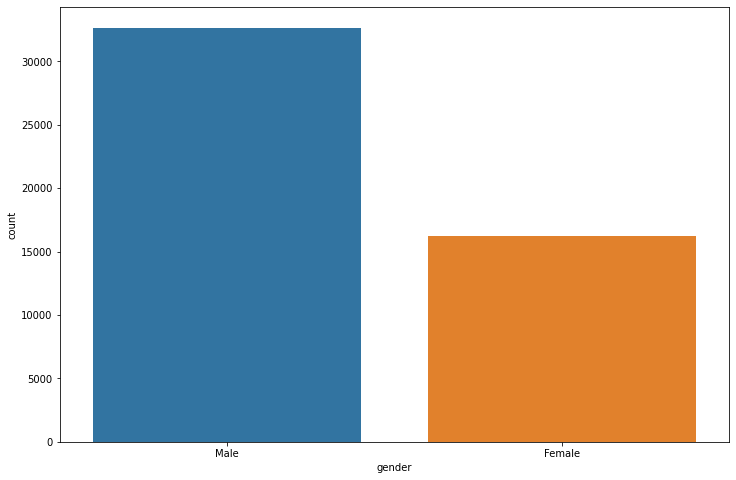

In [45]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x = "gender",data = data)
plt.show()

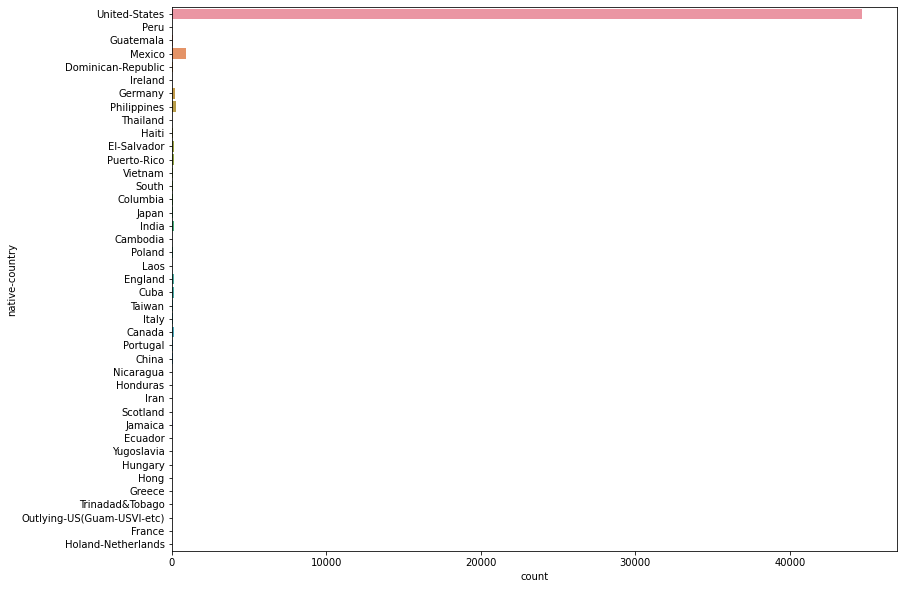

In [46]:
plt.figure(figsize = (13,10))
ax = sns.countplot(y = "native-country",data = data)
plt.show()

In [47]:
native_country = len(data["native-country"][data["native-country"] == "United-States"])

In [48]:
print("the % of native americans in the working population:",(native_country/l)*100)

the % of native americans in the working population: 91.49707219196593


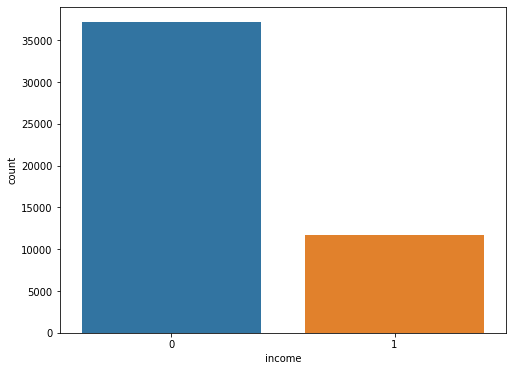

In [49]:
plt.figure(figsize =  (8,6))
ax = sns.countplot(x = "income", data = data)
plt.show()

In [50]:
less_than_50K = len(data.income[data.income == 0])
greater_than_50K = len(data.income[data.income == 1])

print("The number of people earning less than 50K:", less_than_50K, "or ",(less_than_50K / l)*100, "%")
print("The number of people earning greater than 50K:", greater_than_50K, "or ",(greater_than_50K / l)*100,"%")



The number of people earning less than 50K: 37155 or  76.07182343065395 %
The number of people earning greater than 50K: 11687 or  23.928176569346054 %


# Bivatiate analysis
# Age Vs income

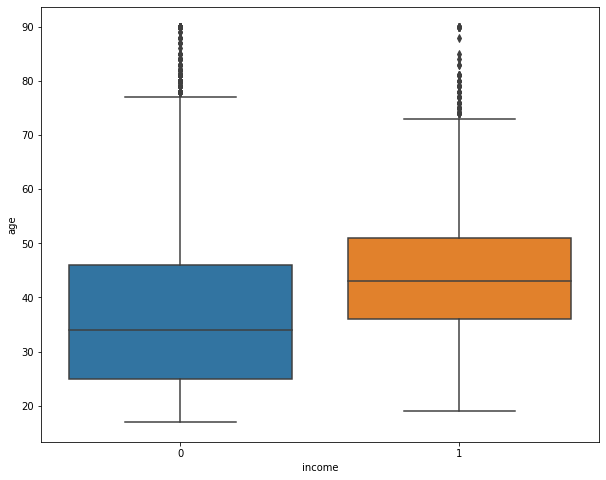

In [51]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = "income", y = "age", data = data)
plt.show()

In [52]:
data[["income","age"]].groupby(["income"],as_index = False).median().sort_values(by = "age",ascending = False)

,income,age
1,1,43.0
0,0,34.0


In [53]:
import random
dataset = data[(np.abs(stats.zscore(data.age)) < 3)]

income_1_age = dataset[dataset.income == 1]["age"]
income_0_age = dataset[dataset.income == 0]["age"]

income_1_age =income_1_age.values.tolist()
income_1_age = random.sample(income_1_age, 100)

income_0_age = income_0_age.values.tolist()
income_0_age = random.sample(income_0_age,100)

income_1_age.sort()
income_0_age.sort()

print("income_1_age",income_1_age)
print("income_0_age",income_0_age)


income_1_age [24, 27, 28, 29, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 36, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 40, 40, 40, 40, 41, 42, 42, 43, 43, 44, 44, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 48, 48, 49, 49, 49, 49, 49, 49, 50, 51, 51, 51, 52, 52, 52, 53, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 59, 59, 59, 59, 59, 60, 61, 70, 71]
income_0_age [17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 23, 23, 23, 24, 24, 24, 26, 26, 27, 27, 28, 28, 28, 28, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 33, 34, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 37, 38, 38, 38, 39, 40, 41, 42, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45, 45, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 52, 52, 54, 55, 56, 58, 58, 59, 64, 65, 69, 73, 76]


In [54]:
from scipy.stats import ttest_ind

t_stats, p_value = ttest_ind(income_1_age, income_0_age, equal_var = True)
print("t_stats:",t_stats)
print("p_value:",p_value)

t_stats: 4.509408171915442
p_value: 1.1120749670033735e-05


In [55]:
if p_value > 0.05:
    print("accept H0: there is no significant difference between the mean of two sample")
else:
    print("reject H0: There is significant differnce between the mean of two sample ")

reject H0: There is significant differnce between the mean of two sample 


# Conclusion:  in this case H0 rejected means , the age varies with the income group. i.e the age is dependent of the income group.

# Hours per Week Vs Income

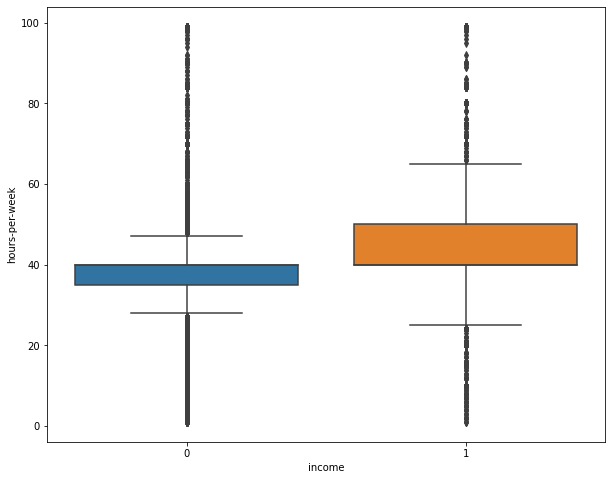

In [56]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = "income", y = "hours-per-week", data = data)
plt.show()

In [57]:
import random

mean = data["hours-per-week"].mean()
std = data["hours-per-week"].std()

print("mean",mean)
print("std",std)


dataset = data[(np.abs(stats.zscore(data["hours-per-week"]))<3)]
dataset.head(30)
dataset["hours-per-week"].head(30)

income_1_HP = dataset[dataset["income"] == 1]["hours-per-week"]
income_0_HP = dataset[dataset["income"] == 0]["hours-per-week"]

income_1_HP = income_1_HP.tolist()
income_1_HP= random.sample(income_1_HP, 100)

income_0_HP = income_0_HP.tolist()
income_0_HP = random.sample(income_0_HP, 100)


income_0_HP.sort()
income_1_HP.sort()

print("income_1_HP:",income_1_HP)
print("income_0_HP:",income_0_HP)



mean 40.422382375824085
std 12.391444024252307
income_1_HP: [10, 15, 18, 20, 20, 30, 30, 30, 32, 32, 32, 33, 33, 34, 35, 35, 35, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 42, 45, 45, 45, 45, 48, 48, 48, 48, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 55, 55, 55, 57, 60, 60, 60, 60, 60, 60, 65, 65, 65, 70]
income_0_HP: [4, 6, 6, 8, 10, 10, 10, 12, 15, 15, 15, 20, 20, 20, 20, 25, 25, 25, 28, 30, 30, 30, 32, 35, 35, 35, 37, 37, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 43, 44, 45, 45, 45, 47, 48, 48, 50, 50, 50, 50, 50, 50, 53, 55, 55, 60, 60, 60, 70, 70, 70]


In [58]:
from scipy.stats import ttest_ind
t_stats, p_value = ttest_ind(income_0_HP, income_1_HP, equal_var = True)
print("t_stats",t_stats)
print("p_value",p_value)

t_stats -2.9633531097376897
p_value 0.003416138987905662


In [59]:
if p_value > 0.05:
    print("Accept H0: There is no significant difference betweent the means of two sample")
else:
    print("Reject H0: There is significant difference between the means of two sample")


Reject H0: There is significant difference between the means of two sample


# Conclusion : Since H0 is rejected , we can conclude by saying that, The hours per week varies with the income. i.e income is dependent on hours per week .

# Capital-gain Vs income

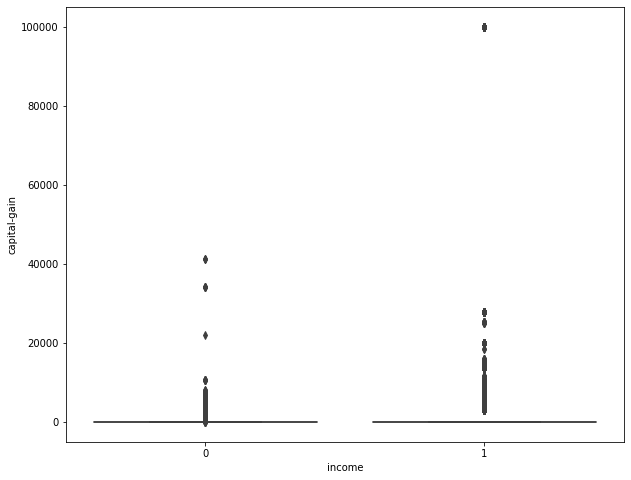

In [60]:
plt.figure(figsize = (10,8))

sx = sns.boxplot(x= "income", y = "capital-gain", data = data)
plt.show()

In [61]:
import random

mean = data["capital-gain"].mean()
std = data["capital-gain"].std()

print("mean",mean)
print("std",std)

dataset = data[np.abs(stats.zscore(data["capital-gain"]))< 3]

income_1_capital_gain = dataset[dataset["income"] == 1]["capital-gain"]
income_0_capital_gain = dataset[dataset["income"] == 0]["capital-gain"]

income_1_capital_gain = income_1_capital_gain.values.tolist()
income_1_capital_gain = random.sample(income_1_capital_gain, 100)


income_0_capital_gain = income_0_capital_gain.values.tolist()
income_0_capital_gain = random.sample(income_0_capital_gain, 100)



mean 1079.0676262233324
std 7452.019057655394


In [62]:
from scipy.stats import ttest_ind, levene

stat,p = levene(income_0_capital_gain, income_1_capital_gain)

if p > 0.05:
    equal_var = True
else:
    equal_var = False
    
print("equal_var:",equal_var)

t_stats, p_value = ttest_ind(income_0_capital_gain,income_1_capital_gain, equal_var = equal_var)
print("t_stats",t_stats)
print("p_value",p_value)

if p_value > 0.05:
    print("Accept H0: there is no signifciant difference between the mean of two sample")
else:
    print("Reject H0: there is signigficat difference between the mean of two sample")
    

equal_var: False
t_stats -2.9214112327176736
p_value 0.004171931115201369
Reject H0: there is signigficat difference between the mean of two sample


# Conclusion : capital gain varies with the income group . i.e the capital gain is dependent on the income group.

# Capital loss Vs income

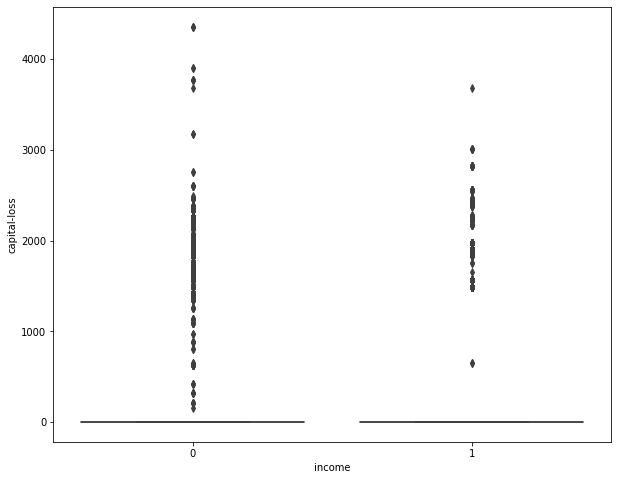

In [63]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = "income", y = "capital-loss", data = data)
plt.show()

In [64]:
import random

dataset = data[(np.abs(stats.zscore(data["capital-loss"])) < 3)]

income_1_capital_loss = dataset[dataset.income == 1]["capital-loss"]
income_0_capital_loss = dataset[dataset.income == 0]["capital-loss"]

income_1_capital_loss.unique()

array([  0, 653], dtype=int64)

In [65]:
from scipy.stats import ttest_ind, levene
t_stats, p_value = ttest_ind(income_1_capital_loss, income_0_capital_loss, equal_var = True)
print("t_stats",t_stats)
print("p_value",p_value)

t_stats -3.5782770894251668
p_value 0.00034621720125440654


In [66]:

income_1_capital_loss = income_1_capital_loss.values.tolist()
income_0_capital_loss = income_0_capital_loss.values.tolist()


stat,p = levene(income_0_capital_loss, income_1_capital_loss)

if p > 0.05:
    equal_var = True
else:
    equal_var = False
    
print("equal_var:",equal_var)

from scipy.stats import ttest_ind
t_stats, p_value = ttest_ind(income_1_capital_loss, income_0_capital_loss, equal_var = equal_var)
print("t_stats",t_stats)
print("p_value",p_value)

equal_var: False
t_stats -6.037578822692599
p_value 1.5763489318539471e-09


In [67]:
if p_value > 0.05:
    print("accept H0: there is no significant difference betweent the mean of two sample")
else:
    print("Reject H0, ther is significant difference between the mean of two sample")

Reject H0, ther is significant difference between the mean of two sample


# conclusion:
 The capital loss varies with the income group. hence capital loss is dependent on the income group.

In [68]:
from scipy.stats import chi2_contingency

# Create a contingency table
observed = [[2, 2,3,4], [2,3,5,7]]

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Check if the expected cell frequencies are greater than 5
print("expected values:",expected)
expected_freq = expected.flatten()

print("expected_fre",expected_freq)
if all(expected_freq >= 5):
    print("The expected cell frequencies are greater than or equal to 5 for at least 80% of the cells.")
else:
    print("The expected cell frequencies are less than 5 for some cells.")


expected values: [[1.57142857 1.96428571 3.14285714 4.32142857]
 [2.42857143 3.03571429 4.85714286 6.67857143]]
expected_fre [1.57142857 1.96428571 3.14285714 4.32142857 2.42857143 3.03571429
 4.85714286 6.67857143]
The expected cell frequencies are less than 5 for some cells.


# Workclass
i. Workclass Vs Income

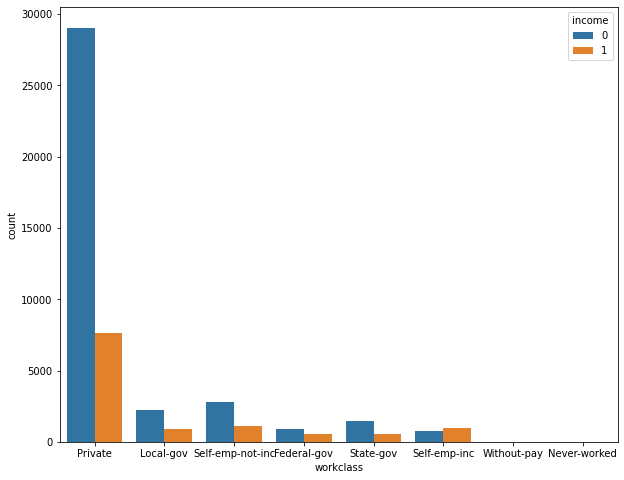

In [69]:
plt.figure(figsize = (10,8))

sns.countplot(x = "workclass", hue = "income", data = data)
plt.show()

In [70]:
c_t = pd.crosstab(data.workclass.sample(frac = 0.005, replace = True, random_state = 1), data.income.sample(frac = 0.005, replace = True, random_state = 1))
c_t

income,0,1
workclass,,
Federal-gov,5,4
Local-gov,13,6
Private,137,44
Self-emp-inc,4,3
Self-emp-not-inc,13,7
State-gov,7,1


In [71]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2_stats, p_value, dof, expected =  chi2_contingency(c_t)
print("dof",dof)
print("p_value",p_value)
print("expected",expected)
print("chi2_stats",chi2_stats)

expected_fre = expected.flatten()
print("expected_fre",expected_fre)

if all(expected_freq >= 5):
    print("The expected cell frequencies are greater than or equal to 5 ofr atlease 80 % of the cells")
else:
    print("the expected cell frequencies are less than 5 for some cells")

dof 5
p_value 0.45670813867515037
expected [[  6.60245902   2.39754098]
 [ 13.93852459   5.06147541]
 [132.78278689  48.21721311]
 [  5.1352459    1.8647541 ]
 [ 14.67213115   5.32786885]
 [  5.86885246   2.13114754]]
chi2_stats 4.67582865491066
expected_fre [  6.60245902   2.39754098  13.93852459   5.06147541 132.78278689
  48.21721311   5.1352459    1.8647541   14.67213115   5.32786885
   5.86885246   2.13114754]
the expected cell frequencies are less than 5 for some cells


# Since the expected cell frquencies are less than 5 for some cells its good idea to use alternative hypothesis instead of the chi2 test. but anyways for now we wil use the chi2 test for hypothesis.

In [72]:
if p_value > 0.05:
    print("accpet H0: there is no significant difference between the means of samples")
else:
    print("Reject H0: there is significant difference between the means of samples")

accpet H0: there is no significant difference between the means of samples


#conclusion: the number of people earning <=50K and >50K does not dependent on the work class

# Education 
i. realtionship with income

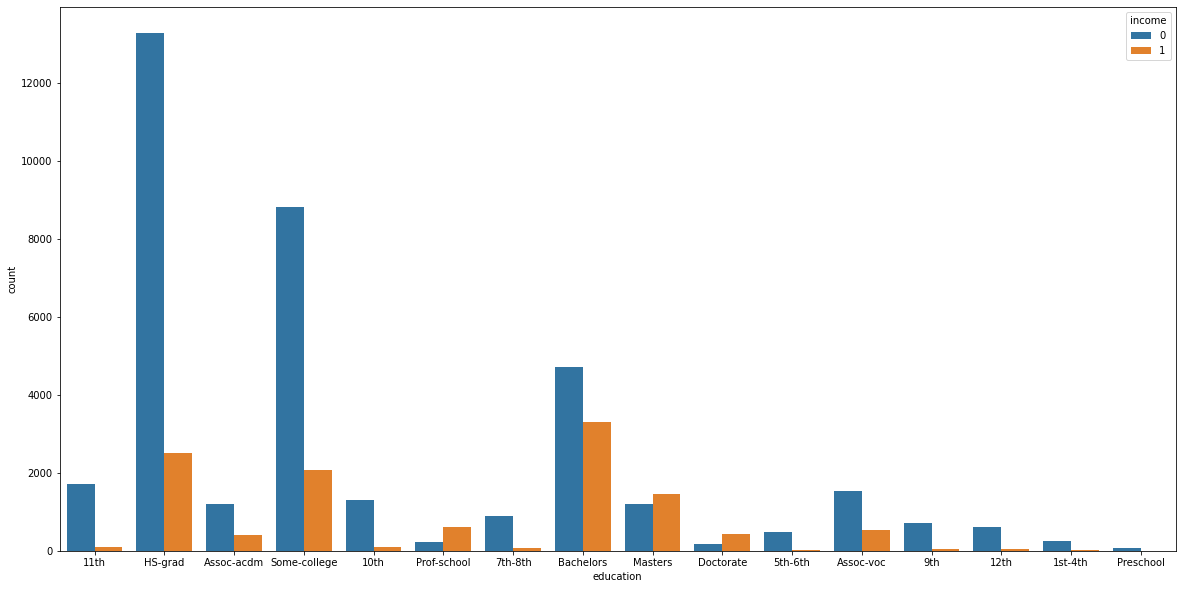

In [73]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = "education", hue = "income", data = data)
plt.show()

In [74]:
c_t = pd.crosstab(data.education.sample(frac = 0.005, replace = True, random_state = 1), data.income.sample(frac = 0.005, replace = True, random_state = 1))
c_t

income,0,1
education,,
10th,6,1
11th,16,0
12th,2,1
7th-8th,3,0
9th,1,0
Assoc-acdm,9,1
Assoc-voc,9,7
Bachelors,19,20
Doctorate,1,3


In [75]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2_stats, p_value, dof, expected = chi2_contingency(c_t)

print("dof",dof)
print("chi2_stats",chi2_stats)
print("p_value",p_value)
print("expected",expected)

dof 12
chi2_stats 39.18403342413548
p_value 9.813259343078112e-05
expected [[ 5.1352459   1.8647541 ]
 [11.73770492  4.26229508]
 [ 2.20081967  0.79918033]
 [ 2.20081967  0.79918033]
 [ 0.73360656  0.26639344]
 [ 7.33606557  2.66393443]
 [11.73770492  4.26229508]
 [28.61065574 10.38934426]
 [ 2.93442623  1.06557377]
 [57.95491803 21.04508197]
 [13.20491803  4.79508197]
 [ 2.20081967  0.79918033]
 [33.01229508 11.98770492]]


In [76]:
if p > 0.005:
    print("Accecpt H0: there is no significant difference between mean of the samples")
else:
    print("Reject H0: ther is significant difference between the mean score of the samples")
    

Reject H0: ther is significant difference between the mean score of the samples


# Concluison: H0 rejected, hence we can conlcude by saying that the number of people earning <=50K and >50K is dependent on the Education 

# Marital-status
i. relationship with income

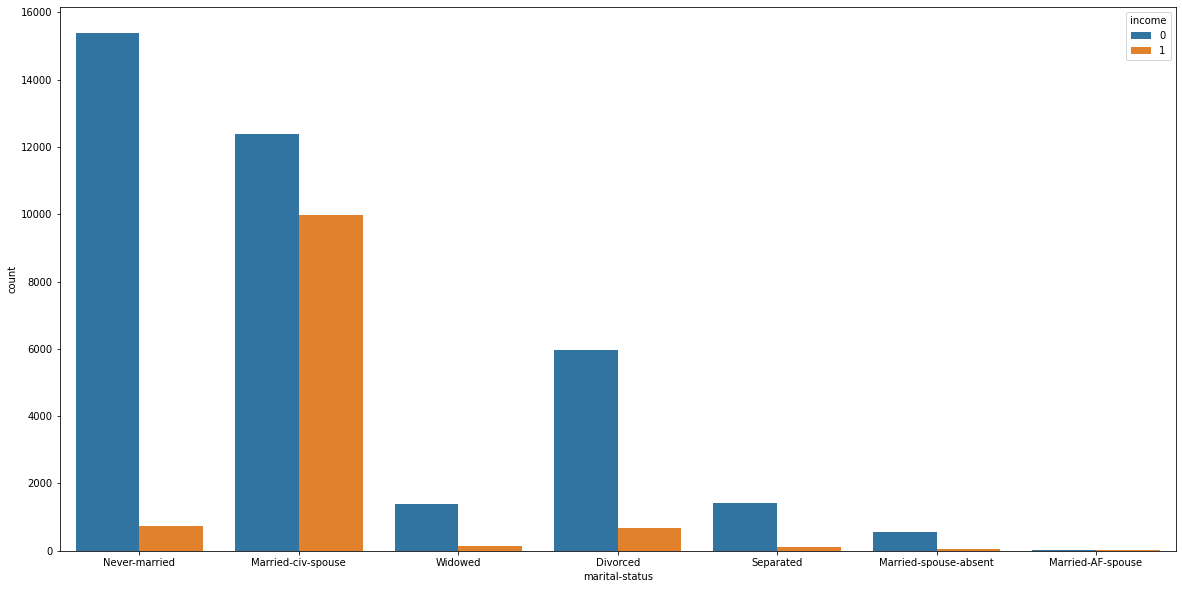

In [77]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = "marital-status", hue = "income", data = data)
plt.show()


In [78]:
c_t = pd.crosstab(data["marital-status"].sample(frac = 0.005, replace = True,random_state = 1),data.income.sample(frac = 0.004, replace = True, random_state = 1))
c_t

income,0,1
marital-status,,
Divorced,17,2
Married-civ-spouse,52,45
Never-married,60,7
Separated,3,1
Widowed,7,1


In [79]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2_stats, p, dof, expected = chi2_contingency(c_t)
print("chi2_stats:",chi2_stats)
print("p:",p)
print("dof:",dof)
print("expected:",expected)

if p > 0.05:
    print("H0 aaccpected: income is not dependent on the marital status")
else:
    print("H0 rejected: income is depdendent on the marital status")

chi2_stats: 29.852883196912064
p: 5.243817067319537e-06
dof: 4
expected: [[13.54358974  5.45641026]
 [69.14358974 27.85641026]
 [47.75897436 19.24102564]
 [ 2.85128205  1.14871795]
 [ 5.7025641   2.2974359 ]]
H0 rejected: income is depdendent on the marital status


# Occoupation
i.plot(occupation with income)

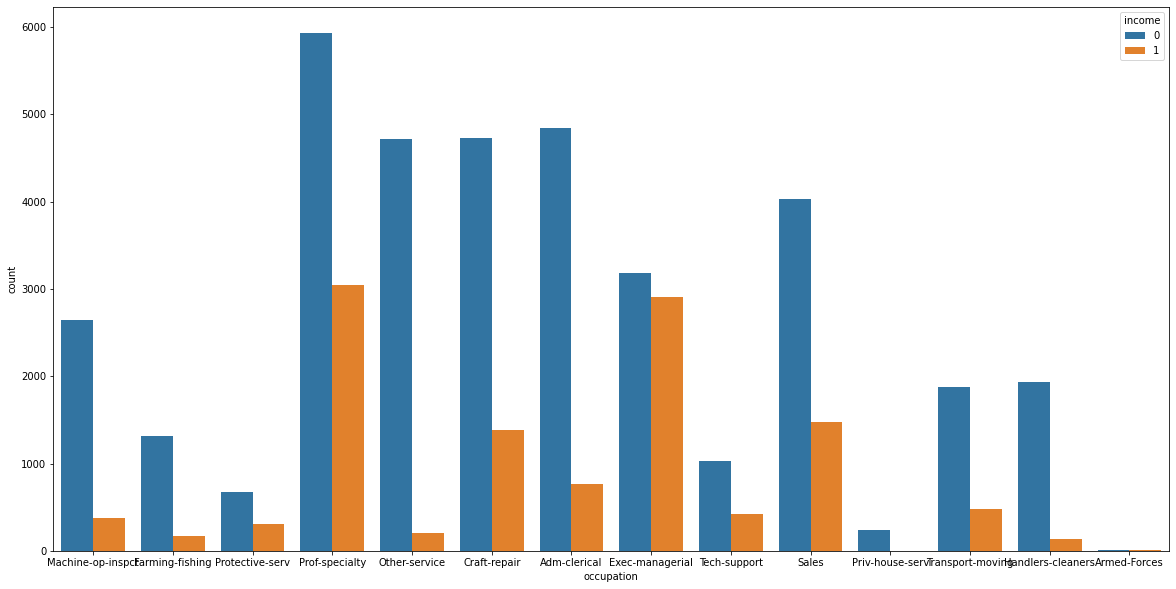

In [80]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = "occupation", hue= "income", data = data)

In [81]:
c_t = pd.crosstab(data.occupation.sample(frac = 0.004, replace = True, random_state = 1),data.income.sample(frac = 0.004, replace = True, random_state = 1))
c_t

income,0,1
occupation,,
Adm-clerical,17,6
Craft-repair,18,5
Exec-managerial,12,14
Farming-fishing,5,1
Handlers-cleaners,9,0
Machine-op-inspct,11,1
Other-service,14,0
Prof-specialty,22,16
Protective-serv,4,1


In [82]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2_stats, p, dof, expected = chi2_contingency(c_t)

print("chi2_stats:",chi2_stats)
print("p_value:",p)
print("dof:",dof)
print("expected:",expected)

chi2_stats: 25.187262643768143
p_value: 0.008558194053873728
dof: 11
expected: [[16.39487179  6.60512821]
 [16.39487179  6.60512821]
 [18.53333333  7.46666667]
 [ 4.27692308  1.72307692]
 [ 6.41538462  2.58461538]
 [ 8.55384615  3.44615385]
 [ 9.97948718  4.02051282]
 [27.08717949 10.91282051]
 [ 3.56410256  1.43589744]
 [16.39487179  6.60512821]
 [ 4.98974359  2.01025641]
 [ 6.41538462  2.58461538]]


In [83]:
if p > 0.05:
    print("H0 accepted: income is not dependent on the occupation")
else:
    print("H0 rejected: income is dependent on the occupation")

H0 rejected: income is dependent on the occupation


# Relationship
i. plot(relationship with income)

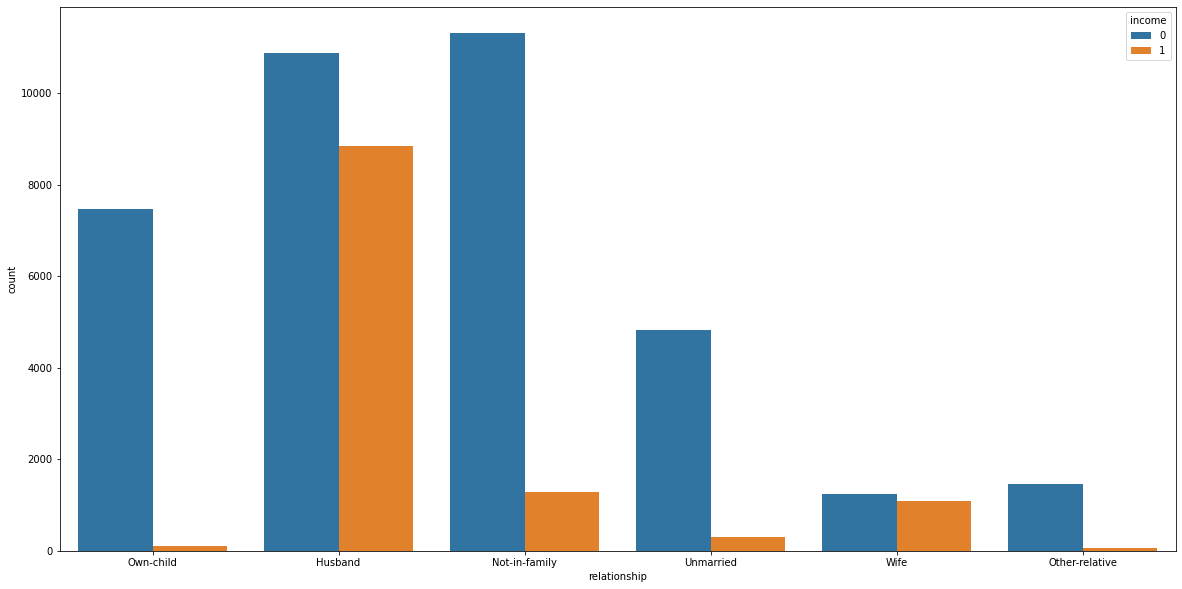

In [84]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = "relationship", hue = "income", data = data)

In [85]:
c_t = pd.crosstab(data.relationship.sample(frac = 0.004, replace = True, random_state = 1),data.income.sample(frac = 0.004, replace = True, random_state = 1))
c_t

income,0,1
relationship,,
Husband,47,39
Not-in-family,41,10
Other-relative,5,0
Own-child,26,0
Unmarried,16,1
Wife,4,6


In [86]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2_stats, p, dof, expected = chi2_contingency(c_t)
print("chi2_stats:",chi2_stats)
print("p_value:",p)
print("dof:",dof)
print("expected:",expected)

chi2_stats: 35.2874494912571
p_value: 1.318411926429466e-06
dof: 5
expected: [[61.3025641  24.6974359 ]
 [36.35384615 14.64615385]
 [ 3.56410256  1.43589744]
 [18.53333333  7.46666667]
 [12.11794872  4.88205128]
 [ 7.12820513  2.87179487]]


In [87]:
if p > 0.05:
    print("accepted H0: income difference is not dependent on the relationship")
else:
    print("rejected H0: income difference is dependent on the relationship")

rejected H0: income difference is dependent on the relationship


# Race
i. plot relationship with income

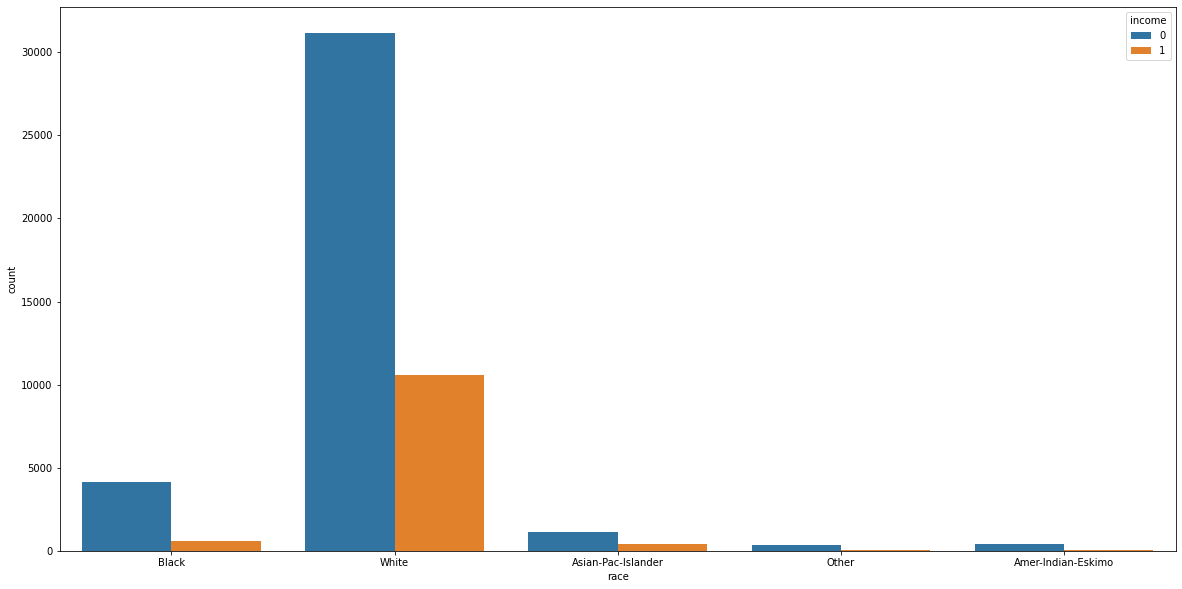

In [88]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = "race", hue = "income", data = data)
plt.show()

In [89]:
c_t = pd.crosstab(data.race.sample(frac = 0.004, replace = True, random_state = 1), data.income.sample(frac = 0.004, replace = True, random_state = 1))
c_t

income,0,1
race,,
Amer-Indian-Eskimo,2,1
Asian-Pac-Islander,5,0
Black,9,1
Other,1,0
White,122,54


In [90]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2_stats, p, dof, expected = chi2_contingency(c_t)
print("Chi2_stats:",chi2_stats)
print("p:",p)
print("dof:",dof)
print("expected",expected)



Chi2_stats: 4.491599901896665
p: 0.3435446765086313
dof: 4
expected [[  2.13846154   0.86153846]
 [  3.56410256   1.43589744]
 [  7.12820513   2.87179487]
 [  0.71282051   0.28717949]
 [125.45641026  50.54358974]]


In [91]:
if p > 0.05:
    print("H0 Accepted: income difference is not dependent on the Race")
else:
    print("H0 Rejected: income difference is dependent on the Race")
    

H0 Accepted: income difference is not dependent on the Race


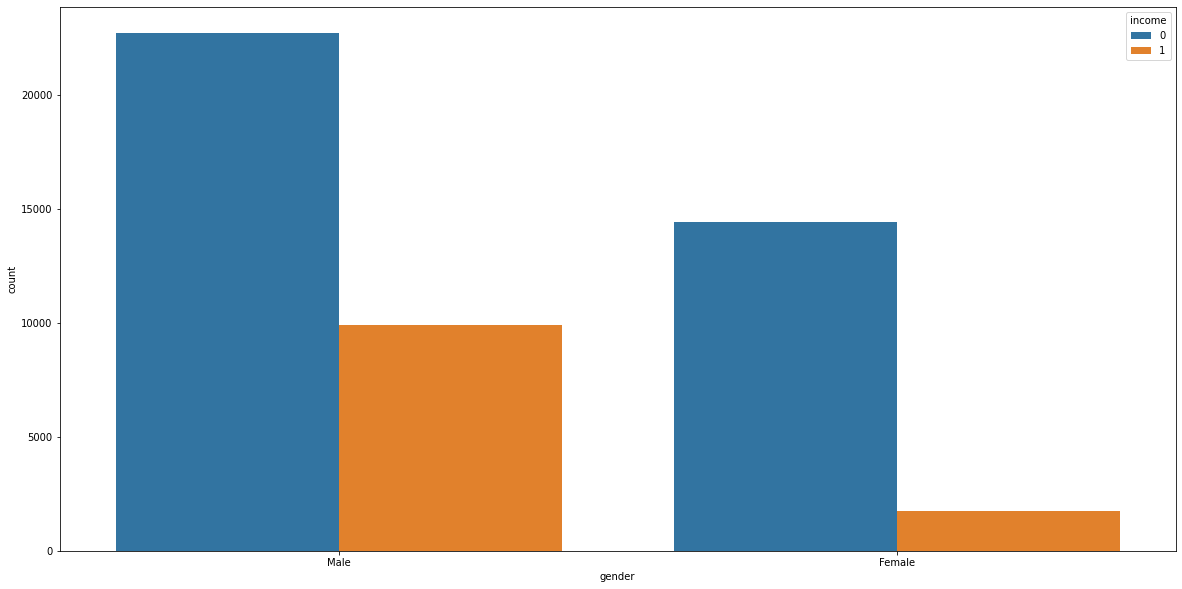

In [92]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = "gender", hue = "income", data = data)
plt.show()

In [93]:
c_t = pd.crosstab(data.gender.sample(frac = 0.004, replace = True, random_state = 1), data.income.sample(frac = 0.004, replace = True, random_state = 1))
c_t

income,0,1
gender,,
Female,47,10
Male,92,46


In [94]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2_stats, p, dof, expected = chi2_contingency(c_t)

print("chi2_stats:",chi2_stats)
print("p:",p)
print("dof",dof)
print("expected",expected)


chi2_stats: 4.171665099270696
p: 0.041105383583817524
dof 1
expected [[40.63076923 16.36923077]
 [98.36923077 39.63076923]]


In [95]:
if p > 0.05:
    print("accpeted H0: income difference is not dependent on the Gender")
else:
    print("rejected H0: income difference is dependent on the Gender")

rejected H0: income difference is dependent on the Gender


# Conclusion : We can conclude by saying that with 95 % confidence we can say that the differnece in income is dependent on the Gender

# Native - Country
i. plot relationship with income

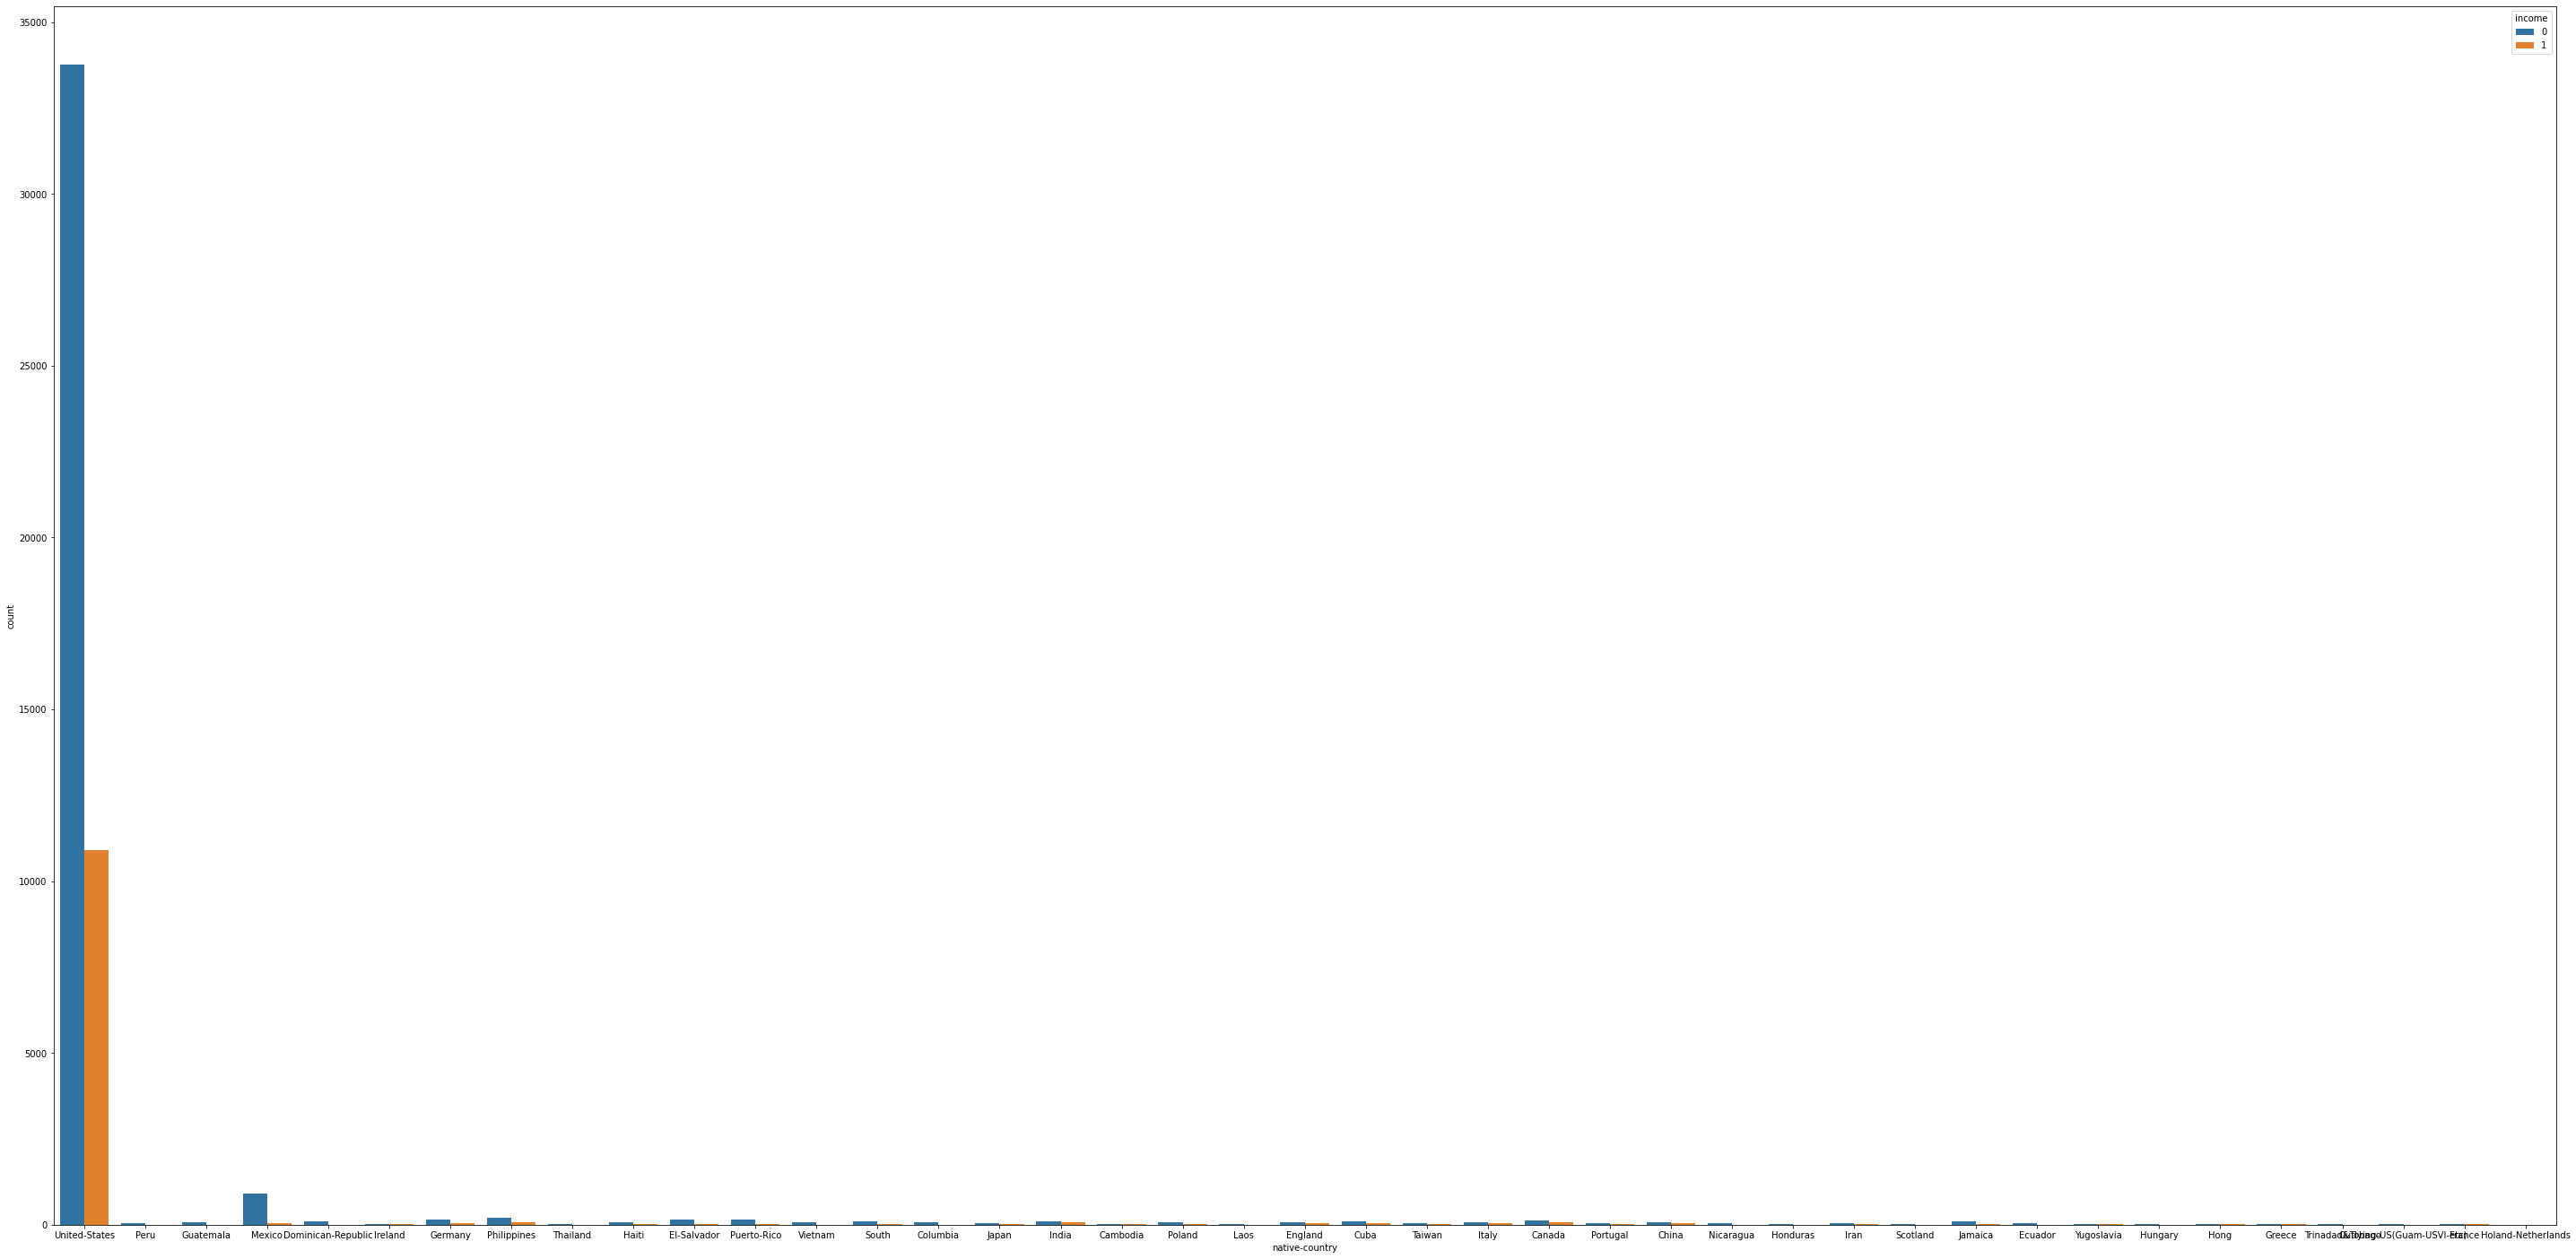

In [96]:
plt.figure(figsize = (50,25))
ax = sns.countplot(x = "native-country", hue = "income", data = data )
plt.show()

In [97]:
c_t = pd.crosstab(data["native-country"].sample(frac = 0.004, replace = True, random_state = 1), data.income.sample(frac = 0.004, replace = True, random_state = 1))
c_t

income,0,1
native-country,,
China,1,0
Cuba,1,1
Dominican-Republic,1,0
Germany,1,0
India,2,0
Jamaica,1,0
Philippines,1,0
Poland,1,0
Portugal,1,0


In [98]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2_stats, p, dof, expected = chi2_contingency(c_t)

print("chi2_stats:",chi2_stats)
print("p:",p)
print("dof",dof)
print("expected:",expected)

chi2_stats: 4.6310159132647035
p: 0.9144259912561064
dof 10
expected: [[  0.71282051   0.28717949]
 [  1.42564103   0.57435897]
 [  0.71282051   0.28717949]
 [  0.71282051   0.28717949]
 [  1.42564103   0.57435897]
 [  0.71282051   0.28717949]
 [  0.71282051   0.28717949]
 [  0.71282051   0.28717949]
 [  0.71282051   0.28717949]
 [  0.71282051   0.28717949]
 [130.44615385  52.55384615]]


In [99]:
if p > 0.05:
    print("H0 accepted: income is not dependent on the Native-Country")
else:
    print("H0 rejected: income is dependent on the Native-Country")
    

H0 accepted: income is not dependent on the Native-Country


# Conclusion: Hence we can say that with 95 % confidence, income is not dependent ont The Native-Country

# Multivariate relationships
i. correlation among the numeric variables

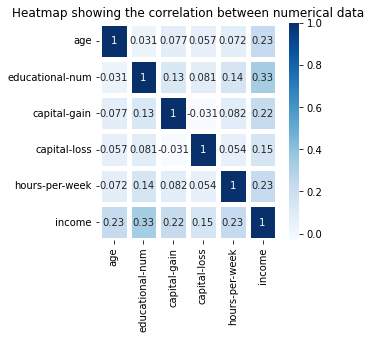

In [100]:
plt.figure(figsize = (4,4))
sns.heatmap(data.corr(), annot = True, linewidths = 5, cmap = "Blues")
plt.title("Heatmap showing the correlation between numerical data")
plt.show()

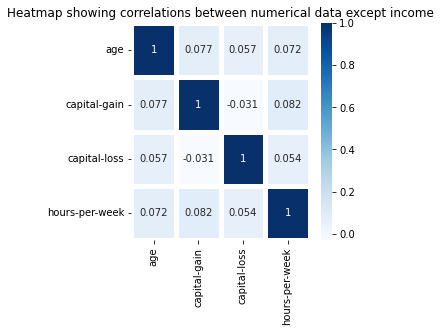

In [101]:
# lets check the correlation between the raemaining numerical variables except the income.

plt.figure(figsize = (4,4))
sns.heatmap(data_num.corr(),annot = True, linewidths = 5, cmap = "Blues")
plt.title("Heatmap showing correlations between numerical data except income")
plt.show()

# as we can see the correlation between the reamaning numeric  variables is very weak, This is exactly why we did the analysis of income with respect to all other varibales. And ignored the analysis between the reamaning variables with respect to each other.

# Multivariate Analysis between "income", "hours-per-week", "gender"

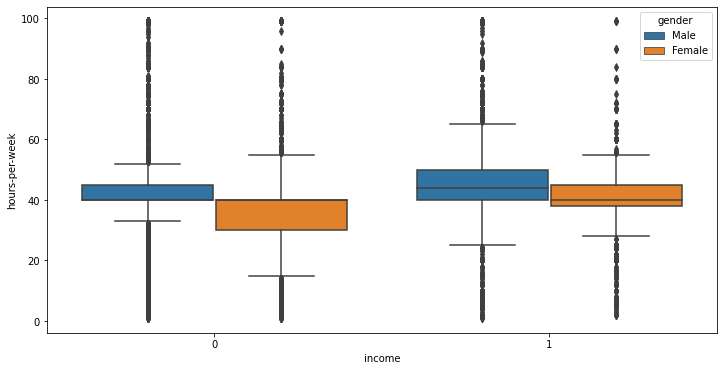

In [103]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "income",y = "hours-per-week", hue = "gender",data = data)
plt.show()

# Multivariate analysis between "income","age" and "gender"

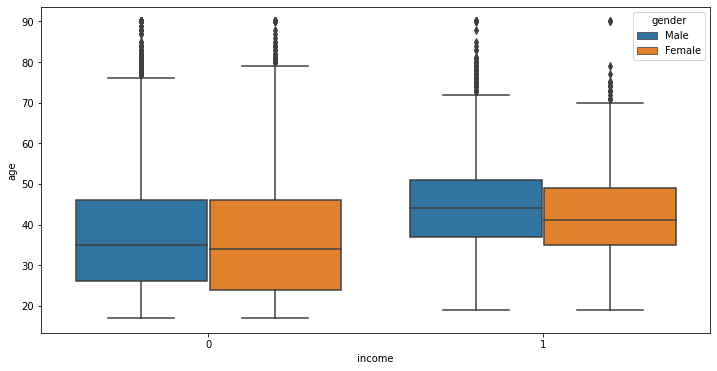

In [105]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "income", y = "age", hue = "gender", data = data)
plt.show()

In [112]:
desired_column = ["workclass", "occupation"]
cat_column = data.dtypes[data.dtypes == "object"]

print(cat_column)
index = cat_column.index
print( "\n\n cat_column.index\n\n", index)

print( "data.dtypes: \n", data.dtypes)
for column in cat_column.index:
    if column in desired_column:
        print(f"====================={column}========================")
        print(data_num[data_num.age == 90][column].value_counts())
    else:
        pass
       

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
native-country    object
dtype: object


 cat_column.index

 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')
data.dtypes: 
 age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object
=====================workclass========================
Private             43
Self-emp-not-inc     5
Local-gov            5
Federal-gov          2
Name: workclass, dtype: int64
=====================occupation================

In [118]:
target_column = ["workclass","occupation"]
column_cat = data.dtypes[data.dtypes == "object"]
index = column_cat.index

for column in index:
    if column in target_column:
        print(f"========{column}=============")
        print(data_num[data_num["hours-per-week"] == 99][column].value_counts())
    else:
        continue

========workclass=============
Private             74
Self-emp-not-inc    36
Self-emp-inc        15
Local-gov            7
State-gov            3
Federal-gov          2
Name: workclass, dtype: int64
========occupation=============
Prof-specialty       36
Farming-fishing      20
Transport-moving     19
Exec-managerial      18
Other-service        15
Craft-repair         10
Sales                 6
Protective-serv       4
Priv-house-serv       4
Adm-clerical          2
Tech-support          2
Handlers-cleaners     1
Name: occupation, dtype: int64


In [119]:
data["capital_change"] = data["capital-gain"] - data["capital-loss"]
data["capital_change"].describe()

count    48842.000000
mean       991.565313
std       7475.549906
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_change, dtype: float64

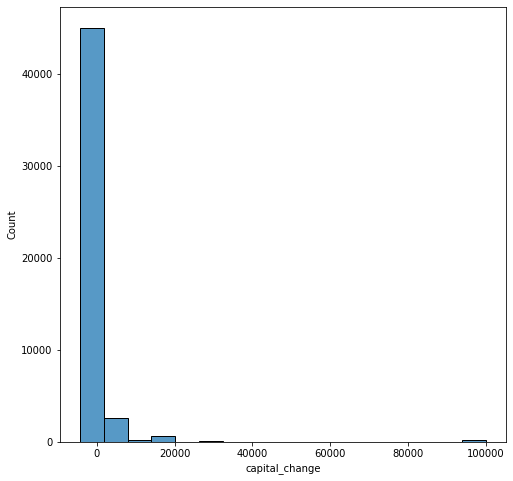

In [121]:
plt.figure(figsize = (8,8))
sns.histplot(x = "capital_change", data = data)
plt.show()

In [126]:
a = len(data["capital_change"][data["capital_change"] <= 0])

b = len(data["capital_change"])

result = round((a/b)*100, 2)

result1 = round((100 - result), 2)

print("% of people whose capital gain < = 0 :", result,"%")
print("% of people whose capital gain > 0 :", result1,"%")

% of people whose capital gain < = 0 : 91.74 %
% of people whose capital gain > 0 : 8.26 %
